# ДЗ №1

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio
from skimage.color import rgb2hsv, hsv2rgb

In [2]:
def compare_images(img, img_new=None):
    if img_new is not None:
        f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,15))
        ax1.imshow(img)
        ax1.set_title('Original')
        ax2.imshow(img_new)
    else:
        plt.figure(figsize=(8, 8))
        plt.imshow(img)
    plt.show()

## Загрузка изображения

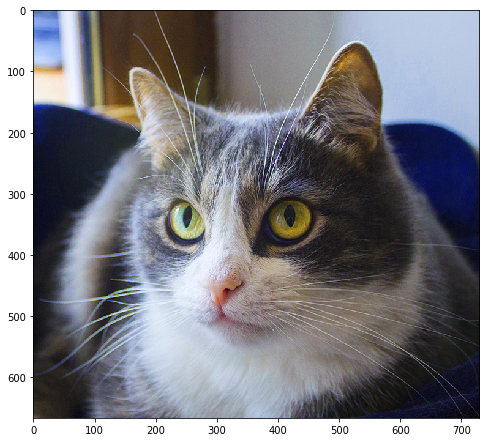

In [3]:
img = imageio.imread('cat-color.png')
img = img.astype(np.float32) / 255.
compare_images(img)

## Простая цветовая обработка

In [4]:
def remove_yellow(img):
    hsv = rgb2hsv(img)
    for i in range(hsv.shape[0]):
        for j in range(hsv.shape[1]):
            h, s, v = hsv[i, j]
            if 0 < h < 0.2:
                s = 0
                v *= 0.9
            hsv[i, j] = [h, s, v]

    return hsv2rgb(hsv)

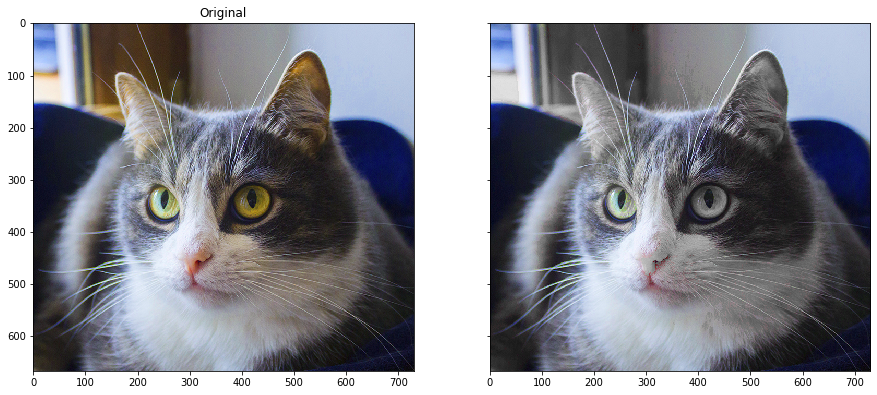

In [5]:
compare_images(img, remove_yellow(img))

In [6]:
def sunny(img):
    out = np.copy(img)
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            r, g, b = out[i, j]
            r, g, b = (max(r, g, b), g, min(r, g, b))
            avg_v = r * 0.2126 + g * 0.7152 + b * 0.0722
            r += (r - avg_v) * 0.6
            g += (g - avg_v) * 0.6
            b += (b - avg_v) * 0.6
            r, g, b = (min(r, 1), min(g, 1), min(b, 1))
            r, g, b = (max(r, 0), max(g, 0), max(b, 0))
            out[i, j] = [r, g, b]
    return out

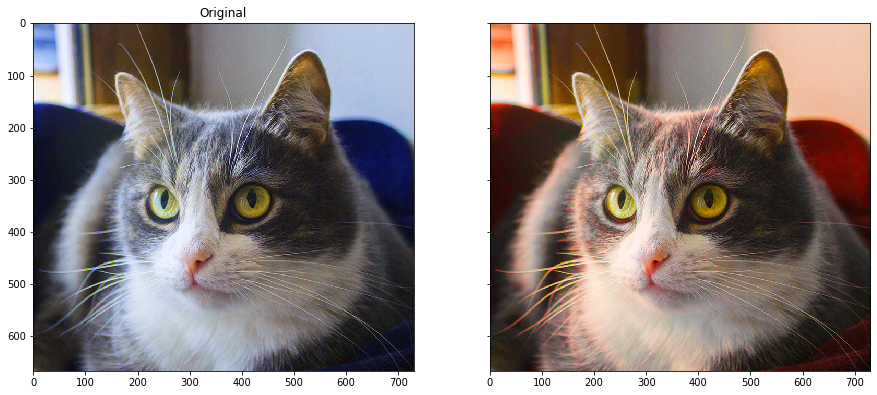

In [7]:
compare_images(img, sunny(img))

In [8]:
def negative(img):
    out = np.copy(img)
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            r, g, b = out[i, j]
            out[i, j] = [1-r, 1-g, 1-b]
    return out

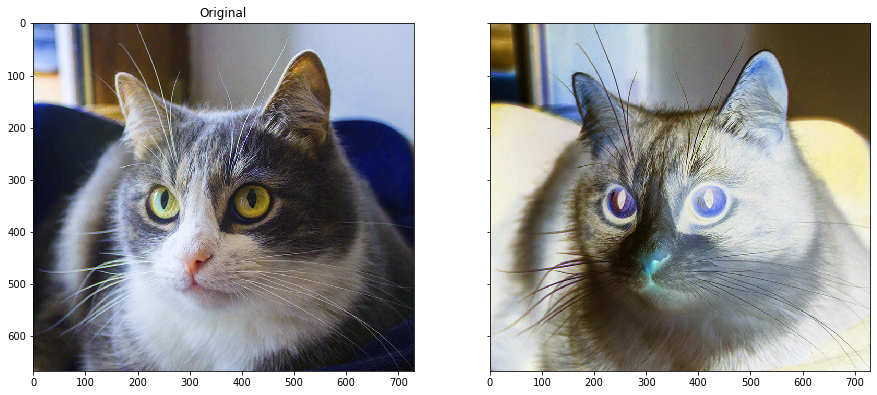

In [9]:
compare_images(img, negative(img))

## Свертка

In [10]:
import scipy.signal

def convolute(img, w):
    out_img = []
    for c in range(3):
        out_img.append(scipy.signal.correlate2d(img[:,:,c], w, mode='valid'))
    return np.stack(out_img, axis=2)

In [11]:
w = np.array([
    [-1,  0, 1,  0, -1],
    [ 0,  1, 1,  1,  0],
    [-1, -1, 0, -1, -1],
    [ 0,  1, 1,  1,  0],
    [-1,  0, 1,  0, -1],
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


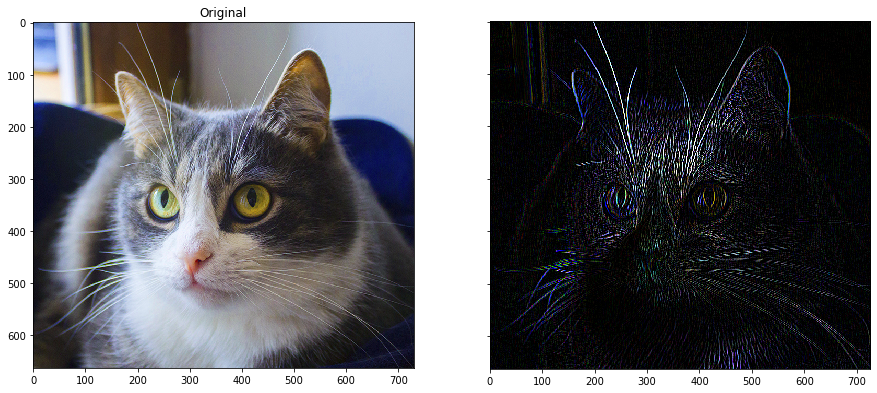

In [12]:
compare_images(img, convolute(img, w))